Import Libraries

In [1]:
import cv2
from cv2 import imshow
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import sklearn

Get the images

In [2]:
path = "C:\\Users\\jonas\\OneDrive\\Computer Vision Masterials\\Datasets\\homer_bart_1.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [3]:
directory = 'homer_bart_1'
files = [os.path.join(directory, f) for f in os.listdir(directory)]
print(files[:5])

['homer_bart_1\\.DS_Store', 'homer_bart_1\\bart1.bmp', 'homer_bart_1\\bart10.bmp', 'homer_bart_1\\bart100.bmp', 'homer_bart_1\\bart101.bmp']


Normalizing the images

In [4]:
#Constants
width, height = 128, 128
images = []
classes = []

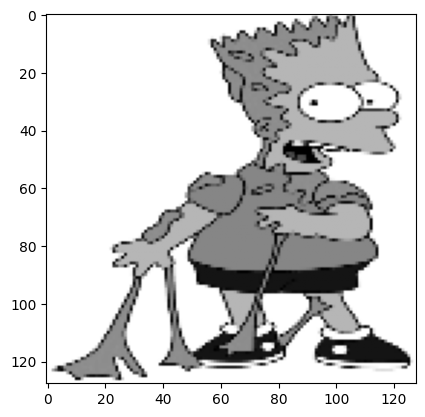

(16384,) 0


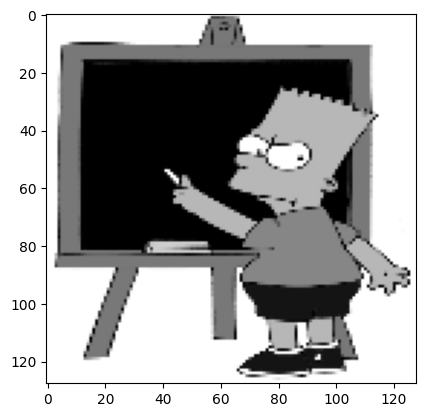

(16384,) 0


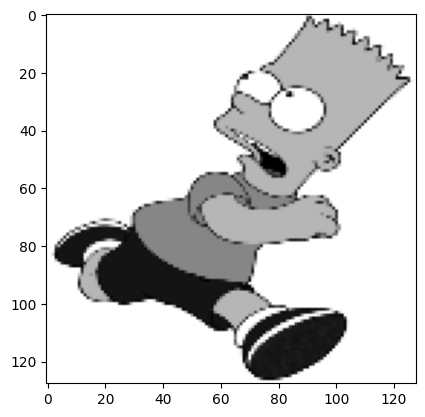

(16384,) 0


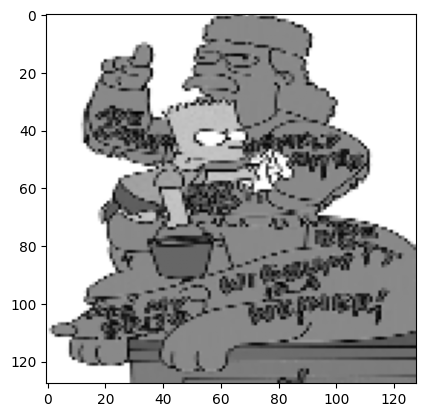

(16384,) 0


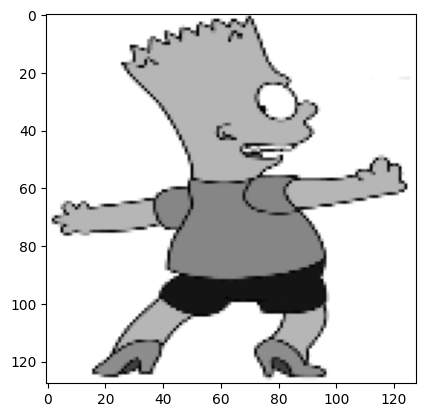

(16384,) 0


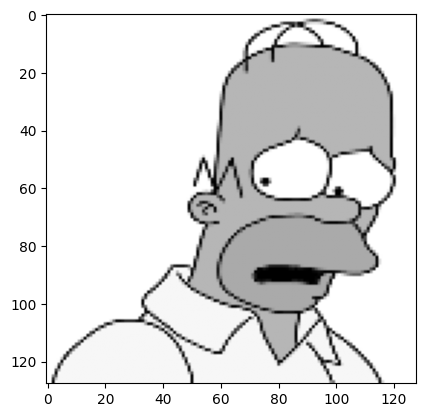

(16384,) 1


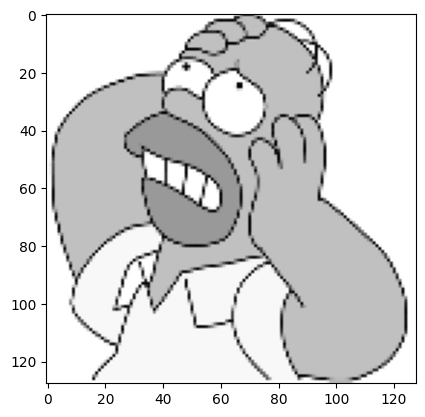

(16384,) 1


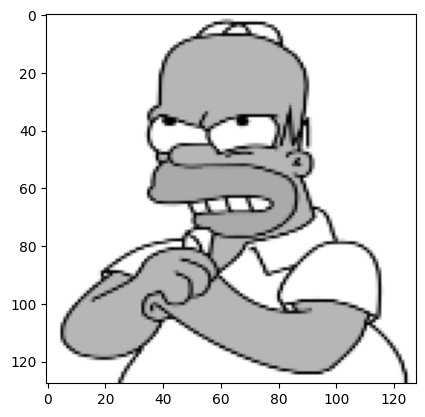

(16384,) 1


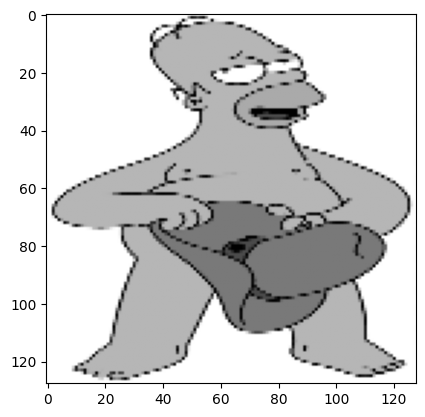

(16384,) 1


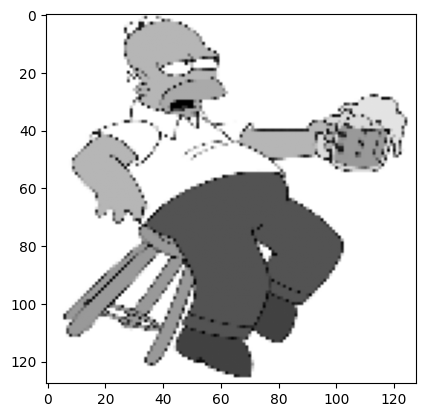

(16384,) 1


In [5]:
for image_path in files:
  try:
    image = cv2.imread(image_path)
    (H,W) = image.shape[:2]
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = image.ravel()
  images.append(image)

  image_name = os.path.basename(image_path)
  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  classes.append(class_name)

#showing the first and last 5 images
for i in range(0, 5):
  plt.imshow(images[i].reshape((width, height)), cmap='gray')
  plt.show() 
  print(images[i].shape, end=" ")
  print(classes[i]) 
for i in range(len(images)-5, len(images)):
  plt.imshow(images[i].reshape((width, height)), cmap='gray')
  plt.show()
  print(images[i].shape, end=" ")
  print(classes[i])

Extracting the Pixels

In [6]:
X = np.array(images)
y = np.array(classes)

Normalizing Data

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
X.max(), X.min()

(1.0000000000000002, 0.0)

Splitting the images into train and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [11]:
X_test.shape, y_test.shape

((54, 16384), (54,))

In [12]:
#Hidden layer = input + number of classes / 2
(16384 + 2) /2

8193.0

In [13]:
#expecifying the input shape, the hidden layer
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

c:\Users\jonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
network1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the optimizer

In [15]:
network1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = network1.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5518 - loss: 128.5469 - val_accuracy: 0.6977 - val_loss: 42.2634
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5598 - loss: 43.7637 - val_accuracy: 0.3023 - val_loss: 1.1343
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4600 - loss: 3.2222 - val_accuracy: 0.3023 - val_loss: 2.6150
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5264 - loss: 1.6272 - val_accuracy: 0.6977 - val_loss: 1.5441
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5476 - loss: 1.5799 - val_accuracy: 0.3023 - val_loss: 1.8059
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4959 - loss: 1.2979 - val_accuracy: 0.3023 - val_loss: 1.6125
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4948 - loss: 1.0453 - val_accuracy: 0.6977 - val_loss: 0.6109
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5999 - loss: 0.6866 - val_accuracy: 0.6744 - val_loss: 0.6327
Epoch 9/25
6

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

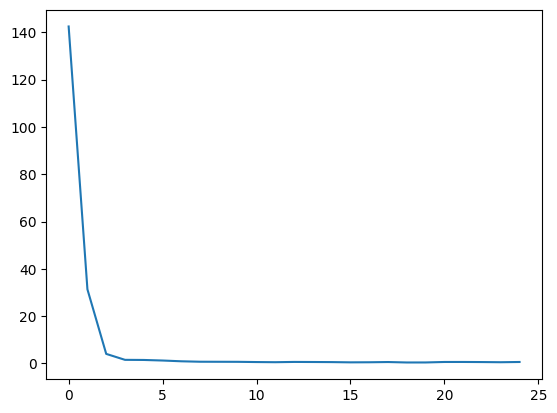

In [18]:
plt.plot(history.history['loss'])

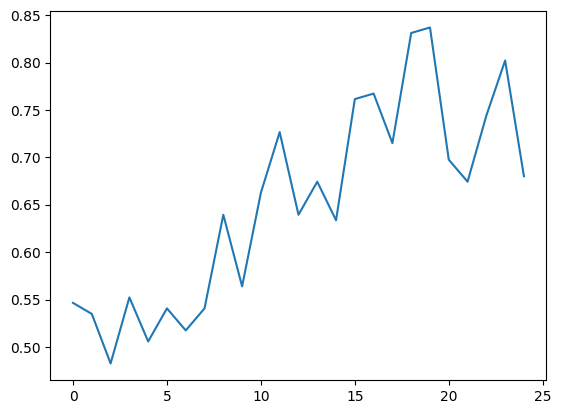

In [19]:
plt.plot(history.history['accuracy'])

In [20]:
X_test.shape

(54, 16384)

In [21]:
prediction=network1.predict(X_test)
prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.57021797],
       [0.5507283 ],
       [0.6626036 ],
       [0.89089864],
       [0.64988077],
       [0.9419277 ],
       [0.47610566],
       [0.806009  ],
       [0.35687095],
       [0.5428507 ],
       [0.8519391 ],
       [0.7193632 ],
       [0.6923821 ],
       [0.5443882 ],
       [0.9147339 ],
       [0.45399547],
       [0.96645105],
       [0.75136393],
       [0.88954294],
       [0.83379954],
       [0.560482  ],
       [0.846354  ],
       [0.41505146],
       [0.64165616],
       [0.39072964],
       [0.8097304 ],
       [0.6029413 ],
       [0.30325902],
       [0.89299357],
       [0.65966094],
       [0.70742655],
       [0.75773144],
       [0.790263  ],
       [0.66764116],
       [0.5843408 ],
       [0.62999904],
       [0.73753595],
       [0.7551011 ],
       [0.8165201 ],
       [0.8802312 ],
       [0.8847595 ],
       [0.8833692 ],
       [0.848731  ],
       [0.865185  ],
       [0.9533224 ],
       [0.7629087 ],
       [0.8322414 ],
       [0.879

In [22]:
predictions = prediction > 0.5
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 5, 20],
       [ 1, 28]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6111111111111112

<Axes: >

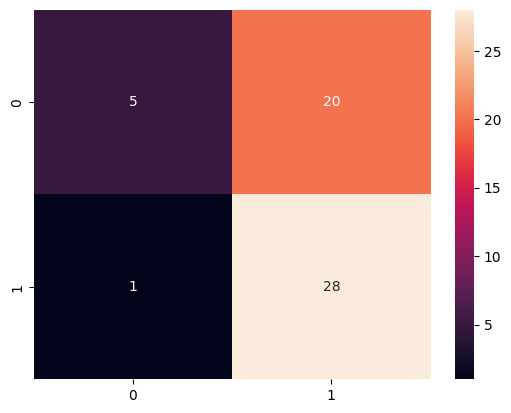

In [25]:
sns.heatmap(cm, annot=True)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.20      0.32        25
           1       0.58      0.97      0.73        29

    accuracy                           0.61        54
   macro avg       0.71      0.58      0.52        54
weighted avg       0.70      0.61      0.54        54



Saving the model

In [27]:
model_json = network1.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

In [28]:
from keras.models import save_model
network1_saved = keras.saving.save_model(network1, "weights1.keras")

In [29]:
with open("model.json", "r") as json_file:
  json_saved = json_file.read()

In [30]:
json_saved

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 16384], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constra

In [31]:
network1_loaded = tf.keras.models.model_from_json(json_saved)
network1_loaded = tf.keras.models.load_model("weights1.keras")

In [32]:
network1_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,151,825 (2.25 GB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 402,767,884 (1.50 GB)

In [33]:
pred = []
for img in X_test:
  img = scaler.inverse_transform(img.reshape(1, -1))
  if network1_loaded.predict(img)[0][0] > 0.5:
    pred.append(1)
  else:
    pred.append(0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

In [34]:
pred

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [39]:
def homer_bart(image):
    '''Gets the name and prediction of a single image'''
    name =""
    image = scaler.inverse_transform(image.reshape(1, -1))
    image.reshape(width, height)
    pred = network1_loaded.predict(image)[0][0]     
    
    #get the name
    if pred > 0.5:
        name = "Homer"
    else:
        name = "Bart"

    return name, pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
('Bart', 1.1670066e-11)


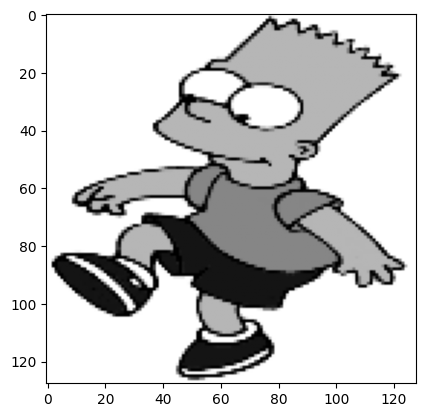

In [40]:
#Print the name and prediction of the a test image
test_image = X_test[6]
print(homer_bart(test_image))

plt.imshow(test_image.reshape(width, height), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
('Homer', 1.0)


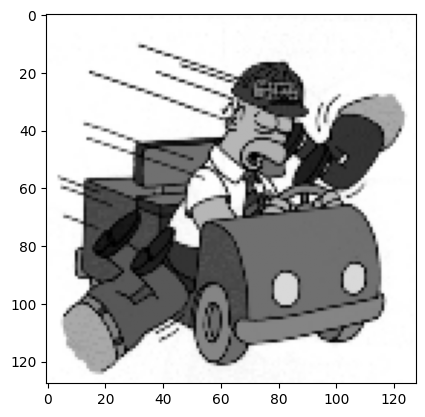

In [41]:
test_image = X_test[7]
print(homer_bart(test_image))

plt.imshow(test_image.reshape(width, height), cmap='gray')
plt.show()